<a href="https://colab.research.google.com/github/shubhamjoshi1303/machine-learning-projects/blob/main/miniproject(handwritten_digits_recognition_mnest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__


'2.8.0'

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

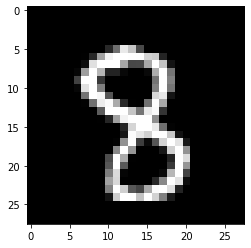

Output:  8


In [ ]:
import matplotlib.pyplot as plt
i= 1344
plt.imshow(x_train[i],cmap='gray')
plt.show()
print(f"Output: ",y_train[i])

In [ ]:
x_train[0].min()

0

In [ ]:
x_train[0].max()


255

In [ ]:
#normalising the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].shape


(28, 28)

In [ ]:
#create a neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape)) #784 neurons in input layer
model.add(tf.keras.layers.Dense(1500,activation ='relu')) #hidden layer can have less than 2*neurons in input = <1568
model.add(tf.keras.layers.Dense(10,activation = 'softmax')) #10 neurons 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 10)                15010     
                                                                 
Total params: 1,192,510
Trainable params: 1,192,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
y_pred = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 12s 4ms/step - loss: 0.1760 - accuracy: 0.9471
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484 - accuracy: 0.9843
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0211 - accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0158 - accuracy: 0.9944
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [ ]:
model.get_weights()

[array([[ 0.04909601, -0.01347019, -0.0439949 , ..., -0.01607749,
          0.04518657,  0.02749881],
        [-0.00771694, -0.04006028, -0.02798662, ...,  0.02236078,
         -0.01861283, -0.02710613],
        [ 0.00967991,  0.02546727,  0.01941325, ..., -0.01652274,
         -0.00667461,  0.00946726],
        ...,
        [ 0.03539884,  0.02168705, -0.03883209, ..., -0.05101386,
         -0.00504494,  0.02576389],
        [-0.04958341,  0.0127736 ,  0.04633332, ...,  0.01267533,
          0.01605871, -0.03753082],
        [ 0.03152489,  0.02580848,  0.01084956, ..., -0.02345191,
         -0.02267004,  0.03255436]], dtype=float32),
 array([-0.04700682,  0.06800857, -0.01049591, ...,  0.03006056,
        -0.01448144, -0.04525715], dtype=float32),
 array([[-0.22201912,  0.27495906, -0.081226  , ..., -0.27379844,
          0.074369  , -0.12000363],
        [-0.19972692, -0.14117102,  0.3270516 , ..., -0.03142212,
          0.15168916, -0.41354105],
        [-0.06917483, -0.03602679, -0.

In [ ]:
import numpy as np
np.argmax(model.predict(x_test),axis=1) #predicted output

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test #actual output

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
#creating a neural network model and storing it .hdf5 format
model.save('model_mnist.hdf5')  #saving weights to use it later
